In [6]:
import pandas as pd
import numpy as np
import csv
df=list()
for i in range(10):
    df.append(pd.read_csv("states"+str(i)+".csv"))

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Utah,2903379,13.468376068376063%,79.40683760683764%,1.0179487179487194%,1.0813675213675222%,2.196068376068376%,0.8259829059829059%,$63488.91780821918,1459229M_1444150F
1,1,Vermont,626604,1.6092896174863391%,93.98306010928961%,0.9808743169398909%,0.301639344262295%,1.2387978142076501%,0.03060109289617486%,$55602.96721311475,308573M_318031F
2,2,Virginia,8256630,8.0110164981373%,63.271048430015945%,20.17599787120807%,0.21245343267695582%,5.455242150079845%,0.06471527408195847%,$72866.01341201717,4060948M_4195682F
3,3,Washington,6985464,11.140968858131506%,72.03840830449816%,3.384429065743947%,1.4107266435986163%,7.022006920415224%,0.609896193771627%,$64493.76768377254,3487725M_3497739F
4,4,West Virginia,1851420,1.290909090909089%,92.17623966942146%,3.6628099173553723%,0.15268595041322316%,0.6824380165289253%,0.02644628099173554%,$41437.11157024794,913631M_937789F
5,5,Wisconsin,5742117,6.683333333333334%,79.86400862068966%,8.195186781609202%,0.9536637931034483%,2.404238505747124%,0.020833333333333332%,$53898.889208633096,2851385M_2890732F


In [10]:
us_census=pd.concat(df, ignore_index=False)
us_census.drop("Unnamed: 0", axis=1,inplace=True)
us_census.drop_duplicates(inplace=True)
us_census.reset_index(inplace=True)
us_census.drop("index", axis=1,inplace=True)

In [82]:
import re
y = r"[0-9]+"
regex = re.compile(y)
result=us_census.Income.apply(lambda x: int(regex.search(x).group()))
us_census.Income=result
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264,19087135M_19334329F


In [165]:
def st(s):
    k=s.split("M_")
    t=k[1].split("F")
    k[1]=t[0]
    return k
pop=us_census.GenderPop.apply(st)
pop_men=list()
pop_women=list()
for i in range(len(pop)):
    pop_men.append(int(pop[i][0]))
    pop_women.append(pop[i][1])
pop_men_ser=pd.Series(pop_men)
pop_women_ser=pd.Series(pop_women)
pop_women_ser=pop_women_ser.replace('',0).astype(int)

numpy.int32

In [167]:
us_census['MalePop'] = pop_men_ser
us_census['FemalePop'] = pop_women_ser


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354,384160M_349215F,384160,349215
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935,1451913M_1506295F,1451913,1506295
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264,19087135M_19334329F,19087135,19334329


In [173]:
us_census.FemalePop[us_census.FemalePop==0]=us_census.TotalPop-us_census.MalePop


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
Name: FemalePop, dtype: bool

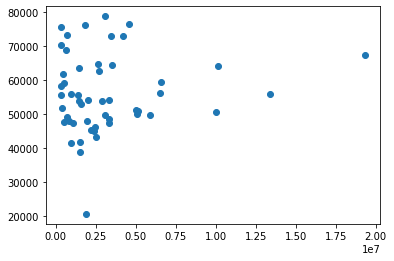

In [181]:
import matplotlib.pyplot as plt
plt.scatter(us_census.FemalePop, us_census.Income) 

plt.show()

In [194]:
def ss(s):
    return float(s[0:5])
us_census.Hispanic=us_census.Hispanic.apply(ss)


In [197]:
us_census.White=us_census.White.apply(ss)
us_census.Black=us_census.Black.apply(ss)
us_census.Native=us_census.Native.apply(ss)
us_census.Asian=us_census.Asian.apply(ss)


TypeError: 'float' object is not subscriptable

In [212]:
us_census.Pacific.fillna(method='ffill',inplace=True)

In [214]:
us_census.Pacific=us_census.Pacific.apply(ss)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,MalePop,FemalePop
0,Alabama,4830620,3.751,61.87,31.250,0.453,1.050,0.034,43296,2341093M_2489527F,2341093,2489527
1,Alaska,733375,5.909,60.91,2.848,16.390,5.450,1.058,70354,384160M_349215F,384160,349215
2,Arizona,6641928,29.560,57.12,3.850,4.355,2.876,0.167,54207,3299088M_3342840F,3299088,3342840
3,Arkansas,2958208,6.215,71.13,18.960,0.522,1.142,0.146,41935,1451913M_1506295F,1451913,1506295
4,California,38421464,37.290,40.21,5.677,0.405,13.050,0.351,67264,19087135M_19334329F,19087135,19334329


In [218]:
us_census.duplicated()
us_census.Hispanic

0      3.751
1      5.909
2     29.560
3      6.215
4     37.290
5     20.780
6     15.600
7      8.824
8      9.165
9     21.330
10     8.418
11     9.186
12    11.500
13    15.600
14     6.536
15     5.303
16    11.640
17     3.222
18     4.866
19     1.431
20     8.472
21    11.460
22     4.634
23     5.152
24     2.842
25     4.037
26     3.268
27     9.203
28    27.100
29     3.321
30    18.740
31    45.280
32    17.240
33     8.464
34     2.832
35     3.672
36    10.070
37    11.440
38     6.128
39    98.890
40    13.350
41     5.056
42     3.239
43     4.720
44    38.040
45    13.460
46     1.609
47     8.011
48    11.140
49     1.290
50     6.683
Name: Hispanic, dtype: float64

Text(0.5, 1.0, 'Hispanic')

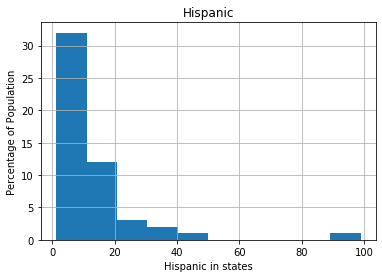

In [228]:
us_census.Hispanic.hist()
plt.ylabel('Percentage of Population')
plt.xlabel('Hispanic in states')
plt.title('Hispanic')

Text(0.5, 1.0, 'White')

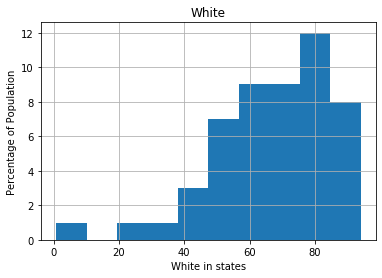

In [234]:
us_census.White.hist()
plt.ylabel('Percentage of Population')
plt.xlabel('White in states')
plt.title('White')


Text(0.5, 1.0, 'black')

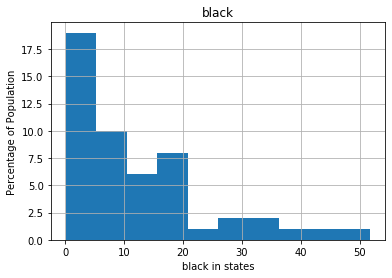

In [231]:
us_census.Black.hist()
plt.ylabel('Percentage of Population')
plt.xlabel('black in states')
plt.title('black')

Text(0.5, 1.0, 'Native')

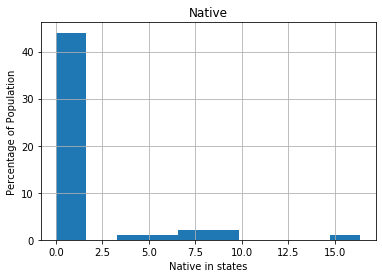

In [232]:
us_census.Native.hist()
plt.ylabel('Percentage of Population')
plt.xlabel('Native in states')
plt.title('Native')

Text(0.5, 1.0, 'Asian')

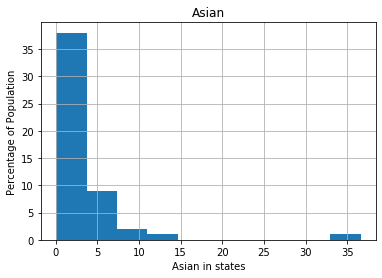

In [233]:
us_census.Asian.hist()
plt.ylabel('Percentage of Population')
plt.xlabel('Asian in states')
plt.title('Asian')

Text(0.5, 1.0, 'Pacific')

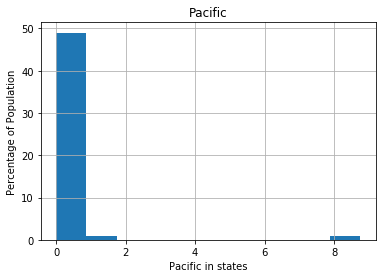

In [235]:

us_census.Pacific.hist()
plt.ylabel('Percentage of Population')
plt.xlabel('Pacific in states')
plt.title('Pacific')

In [240]:
inventory=pd.read_csv("inventory.csv")
inventory.iloc[0:10]

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [241]:
staten_island=inventory.iloc[0:10]
product_request=staten_island.product_description
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [242]:
inventory[(inventory.location=="Brooklyn")& (inventory.product_type=="seeds")]

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [245]:
in_stock=inventory.quantity>0
inventory["in_stock"]=in_stock
inventory.head()

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False


In [246]:
total_value=inventory.price*inventory.quantity
total_value

0       27.96
1      919.54
2     1189.15
3       55.96
4        0.00
5     1859.07
6      961.26
7      191.92
8        0.00
9      211.47
10     349.50
11       0.00
12       0.00
13     209.85
14    7379.18
15     719.64
16    1039.20
17    1823.24
18      89.95
19     103.74
20     398.43
21    1899.05
22     629.55
23     293.79
24    8819.02
25     519.74
26       0.00
27     383.84
28    1565.13
dtype: float64

In [251]:
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
full_description=inventory.apply(combine_lambda,axis=1)
inventory["full_description"]=full_description
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,full_description
0,Staten Island,seeds,daisy,4,6.99,True,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,garden tools - wheelbarrow
